# Data Wrangling 

## Import Library

In [ ]:
import pandas as pd
# Import Drive API and authenticate.
from google.colab import drive
import matplotlib.pyplot as plt


## Pengambilan Data

In [ ]:
#mengambil data dari  "COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University"
#link repo https://github.com/CSSEGISandData/COVID-19

conf = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
recov = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")
deaths = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")

## Pengecekan isi data

In [ ]:
#Shape berguna untuk mengetahui jumlah baris dan kolom
print(conf.shape, recov.shape, deaths.shape)

#Cara membacanya: data conf terdapat 276 baris dan 500 kolom

(276, 512) (261, 512) (276, 512)


In [ ]:
#Melihat data teratas untuk mengecek data
conf.head(100)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,5/4/21,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21,5/30/21,5/31/21,6/1/21,6/2/21,6/3/21,6/4/21,6/5/21,6/6/21,6/7/21,6/8/21,6/9/21,6/10/21,6/11/21,6/12/21
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,60563,60797,61162,61455,61755,61842,62063,62403,62718,63045,63355,63412,63484,63598,63819,64122,64575,65080,65486,65728,66275,66903,67743,68366,69130,70111,70761,71838,72977,74026,75119,76628,77963,79224,80841,82326,84050,85892,87716,88740
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,131327,131419,131510,131577,131666,131723,131753,131803,131845,131890,131939,131978,132015,132032,132071,132095,132118,132153,132176,132209,132215,132229,132244,132264,132285,132297,132309,132315,132337,132351,132360,132372,132374,132379,132384,132397,132415,132426,132437,132449
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,122999,123272,123473,123692,123900,124104,124288,124483,124682,124889,125059,125194,125311,125485,125693,125896,126156,126434,126651,126860,127107,127361,127646,127926,128198,128456,128725,128913,129218,129640,129976,130361,130681,130958,131283,131647,132034,132355,132727,133070
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13316,13340,13363,13390,13406,13423,13429,13447,13470,13470,13510,13510,13510,13555,13569,13569,13569,13569,13569,13569,13569,13664,13671,13682,13693,13693,13693,13727,13729,13744,13752,13758,13758,13758,13777,13781,13791,13805,13813,13813
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,27284,27529,27921,28201,28477,28740,28875,29146,29405,29695,30030,30354,30637,30787,31045,31438,31661,31909,32149,32441,32623,32933,33338,33607,33944,34180,34366,34551,34752,34960,35140,35307,35594,35772,35854,36004,36115,36325,36455,36600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,NaN,Congo (Kinshasa),-4.038300,21.758700,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,30071,30130,30201,30240,30285,30323,30350,30392,30429,30478,30511,30546,30562,30609,30620,30708,30757,30825,30863,30863,30863,31172,31248,31279,31386,31416,31557,31651,31651,31934,32177,32545,32796,33202,33338,33577,33956,34266,34695,34949
96,NaN,Costa Rica,9.748900,-83.753400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,257980,260535,263094,265486,265486,265486,271478,273714,276887,279926,282741,282741,282741,288626,290920,293820,296632,299219,299219,299219,304529,306899,309486,311922,314102,314102,314102,318986,321279,323598,325779,327979,327979,327979,331920,333820,336007,338048,339900,339900
97,NaN,Cote d'Ivoire,7.540000,-5.547100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,46173,46231,46315,46344,46385,46442,46443,46484,46516,46520,46535,46535,46656,46661,46708,46777,46834,46874,46942,46942,47033,47036,47085,47146,47195,47233,47233,47292,47319,47356,47389,47435,47476,47490,47493,47511,47547,47605,47638,47662
98,NaN,Croatia,45.100000,15.200000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

## Menghapus kolom yang tidak digunakan

In [ ]:
#Menghapus kolom Province/State, Lat serta Long(Karena tidak akan digunakan) dan Merubah nama kolom dari Country/Region menjadi Country
tables = (conf, recov, deaths)
for table in tables:
    
    table.drop(["Province/State", "Lat","Long"], axis = 1, inplace = True)
    
    table.rename({"Country/Region":"Country"}, axis = 1, inplace = True)

In [ ]:
#Melihat data yang sudah melalui data cleansing
conf.head(5)

,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,...,5/4/21,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21,5/30/21,5/31/21,6/1/21,6/2/21,6/3/21,6/4/21,6/5/21,6/6/21,6/7/21,6/8/21,6/9/21,6/10/21,6/11/21,6/12/21
0,Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,60563,60797,61162,61455,61755,61842,62063,62403,62718,63045,63355,63412,63484,63598,63819,64122,64575,65080,65486,65728,66275,66903,67743,68366,69130,70111,70761,71838,72977,74026,75119,76628,77963,79224,80841,82326,84050,85892,87716,88740
1,Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,131327,131419,131510,131577,131666,131723,131753,131803,131845,131890,131939,131978,132015,132032,132071,132095,132118,132153,132176,132209,132215,132229,132244,132264,132285,132297,132309,132315,132337,132351,132360,132372,132374,132379,132384,132397,132415,132426,132437,132449
2,Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,...,122999,123272,123473,123692,123900,124104,124288,124483,124682,124889,125059,125194,125311,125485,125693,125896,126156,126434,126651,126860,127107,127361,127646,127926,128198,128456,128725,128913,129218,129640,129976,130361,130681,130958,131283,131647,132034,132355,132727,133070
3,Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13316,13340,13363,13390,13406,13423,13429,13447,13470,13470,13510,13510,13510,13555,13569,13569,13569,13569,13569,13569,13569,13664,13671,13682,13693,13693,13693,13727,13729,13744,13752,13758,13758,13758,13777,13781,13791,13805,13813,13813
4,Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,27284,27529,27921,28201,28477,28740,28875,29146,29405,29695,30030,30354,30637,30787,31045,31438,31661,31909,32149,32441,32623,32933,33338,33607,33944,34180,34366,34551,34752,34960,35140,35307,35594,35772,35854,36004,36115,36325,36455,36600


In [ ]:
#Mengecek jumlah kolom setelah menghapus kolom yang tidak digunakan
conf.shape[1]

509

## Melihat tipe data

In [ ]:
#Mencari informasi keseluruhan jumlah masing-masing tipe data yang terdapat pada data
for table in tables:
    
    print(table.dtypes.value_counts(),"\n")

int64     508
object      1
dtype: int64 

int64     508
object      1
dtype: int64 

int64     508
object      1
dtype: int64 



## Melakukan aggregation nilai data berdasarkan cakupan negara

In [ ]:
#Karena pada data sebelumnya ada kolom berdasarkan kota atau provinsi(Sehingga data dikelompokan berdasarkan kota atau provinsi) 
#maka diperlukan aggregation untuk mengkelompokan keseluruhan data berdasarkan negara

conf = conf.groupby("Country").sum()
recov = recov.groupby("Country").sum()
deaths = deaths.groupby("Country").sum()
conf.head(5)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,5/4/21,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21,5/30/21,5/31/21,6/1/21,6/2/21,6/3/21,6/4/21,6/5/21,6/6/21,6/7/21,6/8/21,6/9/21,6/10/21,6/11/21,6/12/21
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,60563,60797,61162,61455,61755,61842,62063,62403,62718,63045,63355,63412,63484,63598,63819,64122,64575,65080,65486,65728,66275,66903,67743,68366,69130,70111,70761,71838,72977,74026,75119,76628,77963,79224,80841,82326,84050,85892,87716,88740
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,131327,131419,131510,131577,131666,131723,131753,131803,131845,131890,131939,131978,132015,132032,132071,132095,132118,132153,132176,132209,132215,132229,132244,132264,132285,132297,132309,132315,132337,132351,132360,132372,132374,132379,132384,132397,132415,132426,132437,132449
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,122999,123272,123473,123692,123900,124104,124288,124483,124682,124889,125059,125194,125311,125485,125693,125896,126156,126434,126651,126860,127107,127361,127646,127926,128198,128456,128725,128913,129218,129640,129976,130361,130681,130958,131283,131647,132034,132355,132727,133070
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13316,13340,13363,13390,13406,13423,13429,13447,13470,13470,13510,13510,13510,13555,13569,13569,13569,13569,13569,13569,13569,13664,13671,13682,13693,13693,13693,13727,13729,13744,13752,13758,13758,13758,13777,13781,13791,13805,13813,13813
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,27284,27529,27921,28201,28477,28740,28875,29146,29405,29695,30030,30354,30637,30787,31045,31438,31661,31909,32149,32441,32623,32933,33338,33607,33944,34180,34366,34551,34752,34960,35140,35307,35594,35772,35854,36004,36115,36325,36455,36600


In [ ]:
for table in tables:
    
    print(table.shape, "\n")

(276, 509) 

(261, 509) 

(276, 509) 



## Transposing 

In [ ]:
#fungsi .stack() untuk merubah data menjadi tumpukan baris sehingga pada kolom tanggal dan nilai pada tanggal akan terpisah masing-masing menjadi baris baru
#fungsi .reset_index() adalah untuk reset index pada kolom. kalau diperhatikan maka setelah dilakukan reset index akan terdapat kolom yaitu Country, level_1, 0
#fungsi .rename adalah untuk merubah nama kolom yang ingin diubah dengan aturan ("nama_lama", "nama_baru") 

conf = conf.stack().reset_index().rename({"level_1":"Date", 0 : "Confirmed"}, axis = 1)
recov = recov.stack().reset_index().rename({"level_1":"Date", 0 : "Recovered"}, axis = 1)
deaths = deaths.stack().reset_index().rename({"level_1":"Date", 0 : "Deaths"}, axis = 1)
tables = (conf, recov, deaths)

conf.head()

,Country,Date,Confirmed
0,Afghanistan,1/22/20,0
1,Afghanistan,1/23/20,0
2,Afghanistan,1/24/20,0
3,Afghanistan,1/25/20,0
4,Afghanistan,1/26/20,0


## Menggabungkan data (merging)

In [ ]:
for table in tables:
    
    print(table.shape, "\n")

(98044, 3) 

(98044, 3) 

(98044, 3) 



In [ ]:
# Disini kita menggunakan fungsi left seperti halnya join SQL 
# Maka apabila ada data kanan tidak terhubung yang kosong(tidak memiliki nilai) akan di isi oleh null
#left_on dan right_on adalah data yang mau kita gabungkan dimana terdapat nama country dan date / tanggal yang sama diantara data conf, recov dan deaths

df0 = pd.merge(conf, recov,  how="left", left_on=["Country","Date"], right_on = ["Country","Date"])
df = pd.merge(df0, deaths,  how="left", left_on=["Country","Date"], right_on = ["Country","Date"])
df["Date"] = pd.to_datetime(df.Date)
print(df)

           Country       Date  Confirmed  Recovered  Deaths
0      Afghanistan 2020-01-22          0          0       0
1      Afghanistan 2020-01-23          0          0       0
2      Afghanistan 2020-01-24          0          0       0
3      Afghanistan 2020-01-25          0          0       0
4      Afghanistan 2020-01-26          0          0       0
...            ...        ...        ...        ...     ...
98039     Zimbabwe 2021-06-08      39321      36756    1617
98040     Zimbabwe 2021-06-09      39432      36917    1622
98041     Zimbabwe 2021-06-10      39496      36940    1626
98042     Zimbabwe 2021-06-11      39688      36970    1629
98043     Zimbabwe 2021-06-12      39852      36992    1632

[98044 rows x 5 columns]


In [ ]:
df.isna().sum()

Country      0
Date         0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

## Membuat Atribut Baru

### Kasus Aktif

In [ ]:
df["Active Cases"] = df["Confirmed"] - (df["Recovered"] + df["Deaths"])

### Presentasi Kematian

In [ ]:
df["Death Rate(%)"] = ((df["Deaths"].divide(df["Confirmed"]))*100).fillna(0)


### Kenaikan kasus harian

In [ ]:
df = df.sort_values(["Country","Date"])
df["Increase"] = df.groupby("Country")["Confirmed"].diff().fillna(0).astype(int)
print(df.head(200))

         Country       Date  Confirmed  ...  Active Cases  Death Rate(%)  Increase
0    Afghanistan 2020-01-22          0  ...             0       0.000000         0
1    Afghanistan 2020-01-23          0  ...             0       0.000000         0
2    Afghanistan 2020-01-24          0  ...             0       0.000000         0
3    Afghanistan 2020-01-25          0  ...             0       0.000000         0
4    Afghanistan 2020-01-26          0  ...             0       0.000000         0
..           ...        ...        ...  ...           ...            ...       ...
195  Afghanistan 2020-08-04      36773  ...          9814       3.508009        36
196  Afghanistan 2020-08-05      36820  ...          9782       3.519826        47
197  Afghanistan 2020-08-06      36928  ...          9787       3.523072       108
198  Afghanistan 2020-08-07      37006  ...          9793       3.539966        78
199  Afghanistan 2020-08-08      37046  ...          9771       3.549641        40

[20

### Kasus Pertama ditemukan

In [ ]:
firstdays = df[df["Confirmed"] >= 1].groupby("Country").min().reset_index()[["Country","Date"]]
firstdays.rename({"Date":"FirstDays"}, axis = 1, inplace = True)
df = pd.merge(df, firstdays,  how="left", left_on=["Country"], right_on = ["Country"])

### Membuat field hari ke-x dari pertama kasus muncul


In [ ]:
df["day_xth"] = ((df["Date"] - df["FirstDays"] ).astype(str))


# funct lambda berfungsi untuk pengambil data dari index 0 sampai sebelum 05 (dimana ada (space)days  yang di hapus)
funct = lambda x : int(x[0:-5])
#print(df.head(200))


df["day_xth"] = (df["day_xth"].apply(funct)) + 1
print(df.head(200))

df.loc[df['day_xth'] < 0 , ["day_xth"]] = 0

         Country       Date  Confirmed  ...  FirstDays  day_xth    TenCase
0    Afghanistan 2020-01-22          0  ... 2020-02-24      -32 2020-03-11
1    Afghanistan 2020-01-23          0  ... 2020-02-24      -31 2020-03-11
2    Afghanistan 2020-01-24          0  ... 2020-02-24      -30 2020-03-11
3    Afghanistan 2020-01-25          0  ... 2020-02-24      -29 2020-03-11
4    Afghanistan 2020-01-26          0  ... 2020-02-24      -28 2020-03-11
..           ...        ...        ...  ...        ...      ...        ...
195  Afghanistan 2020-08-04      36773  ... 2020-02-24      163 2020-03-11
196  Afghanistan 2020-08-05      36820  ... 2020-02-24      164 2020-03-11
197  Afghanistan 2020-08-06      36928  ... 2020-02-24      165 2020-03-11
198  Afghanistan 2020-08-07      37006  ... 2020-02-24      166 2020-03-11
199  Afghanistan 2020-08-08      37046  ... 2020-02-24      167 2020-03-11

[200 rows x 11 columns]


In [ ]:
print(df.loc[33])

Country                  Afghanistan
Date             2020-02-24 00:00:00
Confirmed                          1
Recovered                          0
Deaths                             0
Active Cases                       1
Death Rate(%)                      0
Increase                           1
FirstDays        2020-02-24 00:00:00
day_xth                            1
Name: 33, dtype: object


### Membuat field 10 kasus pertama dilaporkan

In [ ]:
Case10Day = df[df["Confirmed"] >= 10].groupby("Country").min().reset_index()[["Country","Date"]]
Case10Day.rename({"Date":"TenCase"}, axis = 1, inplace = True)
df = pd.merge(df, Case10Day,  how="left", left_on=["Country"], right_on = ["Country"])

### Membuat field populasi

In [ ]:
#ini optional https://population.un.org/wpp/Download/Standard/Population/
# dataset sudah jadi https://github.com/ocaktans/Gathering-Covid-19-Data/blob/main/Populations.csv

#pop = pd.read_csv("Populations.csv")
#pop = pop[["Country","Total Population(Thousands)"]]
#df = pd.merge(df, pop,  how="left", left_on=["Country"], right_on = ["Country"]).fillna(0)
#df.rename({"Total Population(Thousands)":"Population_1k"}, axis = 1, inplace = True)
#df[["Population_1k"]] = df[["Population_1k"]].astype(int)

### present kasus per 1000 penduduk

In [ ]:
#optional, field populasi harus dijalankan untuk menjalankan perintah ini

#df["Cases/1000s"] = df["Confirmed"].divide(df["Population_1k"]).fillna(0)

## Data Cleaning

### Mencari data anomalies

In [ ]:
#Checking the source, using anomalies

df[df["Increase"] < 0].groupby("Country").agg(["sum","count"])["Increase"].sort_values(["sum"]).head(10)

,sum,count
Country,,
France,-423191,10
Spain,-84753,3
Ecuador,-11066,4
United Kingdom,-7149,2
Czechia,-2214,1
Denmark,-2001,1
Luxembourg,-1348,1
Benin,-209,1
Portugal,-161,1


In [ ]:
df[df["Active Cases"] < 0].groupby("Country").agg(["sum","count"])["Active Cases"].sort_values(["sum"]).head(10)

,sum,count
Country,,
Peru,-11910302,236
El Salvador,-3628,4
Madagascar,-170,2
Cote d'Ivoire,-62,1
Suriname,-18,4
Timor-Leste,-4,1
Djibouti,-3,1
Uganda,-2,1
Barbados,-1,1


In [ ]:
#Negative values in the active cases attribute most likely to show the lack/ineffectiveness of testings in a country. Infected individuals may be passing away before a confirmation

### Mencari NaN Values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98044 entries, 0 to 98043
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Country        98044 non-null  object        
 1   Date           98044 non-null  datetime64[ns]
 2   Confirmed      98044 non-null  int64         
 3   Recovered      98044 non-null  int64         
 4   Deaths         98044 non-null  int64         
 5   Active Cases   98044 non-null  int64         
 6   Death Rate(%)  98044 non-null  float64       
 7   Increase       98044 non-null  int64         
 8   FirstDays      98044 non-null  datetime64[ns]
 9   day_xth        98044 non-null  int64         
 10  TenCase        94996 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(1), int64(6), object(1)
memory usage: 9.0+ MB


### Mengetahui jumlah negara yang melaporkan dibawah 10 kasus corona

In [ ]:
(df.groupby("Country").max()["Confirmed"] < 10).sum()

6

In [ ]:
df[df["TenCase"].isnull()].value_counts("Country").count()


6

In [ ]:
#Melakukan pengecekan data confirmed terakhir dengan summary Increase harus sama

df2 = df.groupby(["Country"]).agg(["last","sum"])[["Increase","Confirmed"]]

df3 = df2["Confirmed"]["last"] - df2["Increase"]["sum"]

df3 = pd.DataFrame(data = df3)

df3[df3[0] !=0]

,0
Country,
China,548
Japan,2
"Korea, South",1
Taiwan*,1
Thailand,4
US,1


In [ ]:
country6 = df3[df3[0] !=0].index
filtered = df[df.Country.isin(country6)]
print(filtered.head()) #untuk mengecek firstdays dari negara yang confirmed terakhirnya tidak sama dengan summary increase

filtered[filtered["Date"] == "2020-01-22"][["Country","Confirmed"]]

      Country       Date  Confirmed  ...  FirstDays  day_xth    TenCase
18288   China 2020-01-22        548  ... 2020-01-22        1 2020-01-22
18289   China 2020-01-23        643  ... 2020-01-22        2 2020-01-22
18290   China 2020-01-24        920  ... 2020-01-22        3 2020-01-22
18291   China 2020-01-25       1406  ... 2020-01-22        4 2020-01-22
18292   China 2020-01-26       2075  ... 2020-01-22        5 2020-01-22

[5 rows x 11 columns]


,Country,Confirmed
18288,China,548
44196,Japan,2
46736,"Korea, South",1
86360,Taiwan*,1
87884,Thailand,4
90932,US,1


Diketahui ketidaksamaan data kasus terakhir dengan jumlah kenaikan kasus dikarenakan kesalahan pada kolom FirstDays dikarenakan 5 negara tersebut mengalami kasus covid pertama sebelum tanggal 1/22/2020 sedangkan tanggal awal pada dataset adalah 1/22/2020

### Merubah FirstDays

In [ ]:
df.loc[df.Country == "China", "FirstDays"] = "2019-12-31"
df.loc[df.Country == "China", "TenCase"] = "2019-12-31"
df.loc[df.Country == "Japan", "FirstDays"] = "2020-01-16"
df.loc[df.Country == "Korea, South", "FirstDays"] = "2020-01-20"
df.loc[df.Country == "Taiwan*", "FirstDays"] = "2020-01-21"
df.loc[df.Country == "Thailand", "FirstDays"] = "2020-01-08"
df.loc[df.Country == "US", "FirstDays"] = "2020-01-21"

df["FirstDays"] = pd.to_datetime(df.FirstDays)
df["TenCase"] = pd.to_datetime(df.TenCase)

In [ ]:
# Angka kenaikan pada FirstDays diubah menjadi None

df.loc[(df["Date"] == "2020-01-22") & (df["Country"] == "China"), ["Increase"]] = None
df.loc[(df["Date"] == "2020-01-22") & (df["Country"] == "Japan"), ["Increase"]] = None
df.loc[(df["Date"] == "2020-01-22") & (df["Country"] == "Korea, South"), ["Increase"]] = None
df.loc[(df["Date"] == "2020-01-22") & (df["Country"] == "Taiwan*"), ["Increase"]] = None
df.loc[(df["Date"] == "2020-01-22") & (df["Country"] == "Thailand"), ["Increase"]] = None
df.loc[(df["Date"] == "2020-01-22") & (df["Country"] == "US"), ["Increase"]] = None

## Export Data dengan format CSV Ke Google Drive

In [ ]:
# Mount your Drive to the Colab VM.
drive.mount('/content/gdrive', force_remount=True)

# Write the DataFrame to CSV file.
path = "gdrive/MyDrive/Narasiodata/"
df.to_csv(path+"Covid-19 Dataset.csv", index=None)

df


Mounted at /content/gdrive


,Country,Date,Confirmed,Recovered,Deaths,Active Cases,Death Rate(%),Increase,FirstDays,day_xth,TenCase
0,Afghanistan,2020-01-22,0,0,0,0,0.000000,0.0,2020-02-24,0,2020-03-11
1,Afghanistan,2020-01-23,0,0,0,0,0.000000,0.0,2020-02-24,0,2020-03-11
2,Afghanistan,2020-01-24,0,0,0,0,0.000000,0.0,2020-02-24,0,2020-03-11
3,Afghanistan,2020-01-25,0,0,0,0,0.000000,0.0,2020-02-24,0,2020-03-11
4,Afghanistan,2020-01-26,0,0,0,0,0.000000,0.0,2020-02-24,0,2020-03-11
...,...,...,...,...,...,...,...,...,...,...,...
98039,Zimbabwe,2021-06-08,39321,36756,1617,948,4.112306,83.0,2020-03-20,446,2020-04-06
98040,Zimbabwe,2021-06-09,39432,36917,1622,893,4.113410,111.0,2020-03-20,447,2020-04-06
98041,Zimbabwe,2021-06-10,39496,36940,1626,930,4.116873,64.0,2020-03-20,448,2020-04-06
98042,Zimbabwe,2021-06-11,39688,36970,1629,1089,4.104515,192.0,2020-03-20,449,2020-04-06


## Menyimpan kasus covid Indonesia

In [ ]:
df_indonesia = df.loc[(df.Country == "Indonesia")]
df_indonesia.to_csv(path+"Covid-19 Indonesia Dataset.csv", index=None)


#Data Visualization

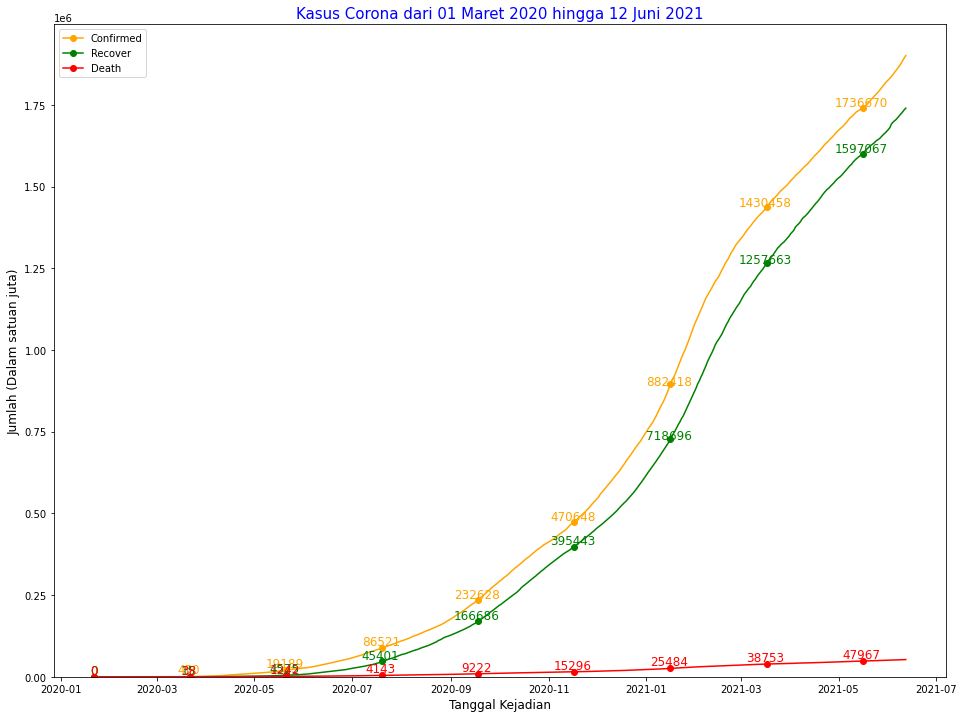

In [ ]:
#!pip install adjustText

fig = plt.figure(figsize=(16,12))
plt.plot(df_indonesia.Date, df_indonesia.Confirmed, label = "Confirmed", color = "orange",marker='o',markevery=60)
plt.plot(df_indonesia.Date, df_indonesia.Recovered, label = "Recover", color = "green",marker='o',markevery=60)
plt.plot(df_indonesia.Date, df_indonesia.Deaths, label = "Death", color = "red",marker='o',markevery=60)
plt.title('Kasus Corona dari 01 Maret 2020 hingga 12 Juni 2021',fontsize=15, color='blue')
plt.xlabel('Tanggal Kejadian', fontsize = 12)
plt.ylabel('Jumlah (Dalam satuan juta)',fontsize = 12)
plt.ylim(ymin=0)


# instanciate a figure and ax object
# annotate is a method that belongs to axes
#plt.plot(df_indonesia.Date, df_indonesia.Confirmed, 'ro',markersize= 2)


def anotation_data(data_y, color_text):
  range_data = 1
  for i,j in zip(df_indonesia.Date,data_y):
      if range_data % 60 == 0 or range_data == 1:
          plt.annotate(str(j) ,  xy=(i, j), color=color_text,
                fontsize="large", weight='normal',
                horizontalalignment='center',
                verticalalignment='bottom',
              )
      range_data+=1

anotation_data(df_indonesia.Confirmed, 'orange')    
anotation_data(df_indonesia.Recovered, 'green')    
anotation_data(df_indonesia.Deaths, 'red')    

# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()


fig.savefig(path+'indonesia_covid19.png')
fig.savefig(path+'indonesia_covid19.pdf')